# TSF-GRIP-Data Science and Business Analytics

# Prediction using Unsupervised ML

By- Bhagyashree 

The main objective of this task is to predict the optimum number of clusters
and represent it visualy from the given ‘Iris’ dataset using unsupervised ML.

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [65]:
#Loading the Iris dataset 
df=pd.read_csv('Iris.csv')

In [3]:
#Displaying the first five rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Displaying the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [5]:
#Describing the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
#Displaying the species
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
#Checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# VISUALIZATION OF THE DATA

In [25]:
#Correlation of the data
corr_df=df.corr()
corr_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

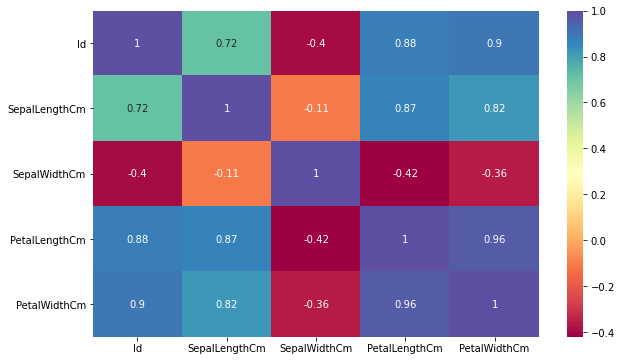

In [21]:
#Plotting heat map
plt.figure(figsize=[10,6])
sns.heatmap(corr_df, cmap='Spectral', annot=True)

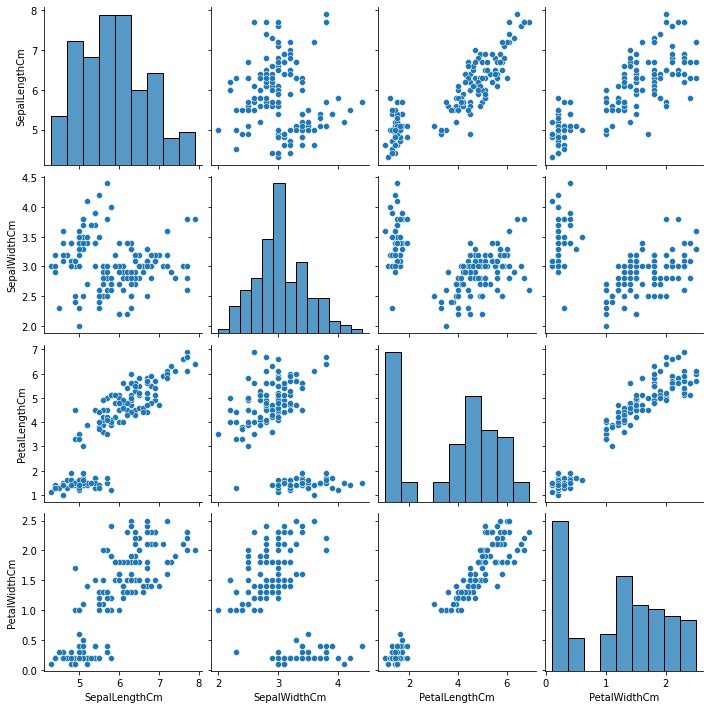

In [31]:
#Plotting graphs considering different attributes
sns.pairplot(df.iloc[:,1:])

# FINDING THE OPTIMUM NUMBER OF CLUSTERS USING K-MEANS CLUSTERING ALGORITHM

In [46]:
x=df.iloc[:,[0,1,2,3]].values

In [47]:
wcss = [] #Within cluster sum of square

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

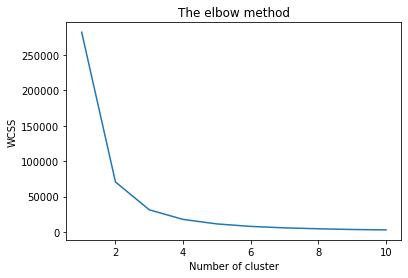

In [49]:
#Plotting the graph
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

K-means Classifier

In [68]:
#Kmeans classifier
km = KMeans(n_clusters = 3, init='k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_km = km.fit_predict(x)
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# VISUALIZATION OF THE CLUSTERS

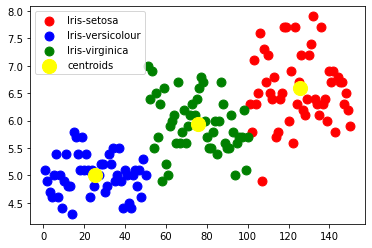

In [69]:
#Plotting the clusters
plt.scatter(x[y_km == 0,0], x[y_km == 0,1], s = 80, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_km == 1,0], x[y_km == 1,1], s = 80, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_km == 2,0], x[y_km == 2,1], s = 80, c = 'green', label = 'Iris-virginica')
#PLotting the centroid of the cluster
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 200, c = 'yellow', label='centroids')
plt.legend()

Thus this task to predict the optimum number of clusters
and represent it visualy has been done successfully using K-means unsupervised ML.

Thankyou!